

# <div style= "text-align:center; font-family: Cambria; font-weight:bold; letter-spacing: 0px;  font-size:150%; text-align:left;padding:2.5px; border-bottom: 4px solid #00001a; "> KERNEL  🌀<div>
<div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px;  font-size:100%; text-align:left;padding:2.5px; border-bottom: 4px solid #00001a; ">In Convolutional neural network, the kernel is nothing but a filter that is used to extract the features from the images. The kernel is a matrix that moves over the input data, performs the dot product with the sub-region of input data, and gets the output as the matrix of dot products. CNNs use multiple kernels in each layer to extract multiple features from the input data simultaneously, which helps to increase the network's representational power and learn more complex features. The output of each layer's kernels is then passed through a non-linear activation function, such as ReLU, to introduce non-linearity into the network and enable it to learn more complex and abstract features.<div>



# <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px;  font-size:100%; text-align:left;padding:2.5px; border-bottom: 4px solid #00001a; "> TABLE OF CONTENTS<div>
* [PACKAGE IMPORTS](#1)
* [Image Show Function](#2)
* [Image Properties](#3)
* [Kernel Function](#5)
* [Sharpen](#6)   
* [Emboss](#7)
* [Top Sobel](#8)
* [Right Sobel](#9)
* [Left Sobel](#10)
* [Bottom Sobel](#11)
* [Outline](#12)
* [Identiry](#13)
* [Custom](#14)
* [Blur](#15)


<a id="1"></a>
**Package**

In [2]:
import cv2
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

<a id="2"></a>
**Image Show Function**

In [4]:
def imageShow(imageTitle, image):
    imageVariable = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(4, 2))
    plt.imshow(imageVariable)
    plt.title(imageTitle)
    plt.show()

<a id="3"></a>

In [5]:
inputDataPath = plt.imread("../input/skindataset/skincancer.jpg")

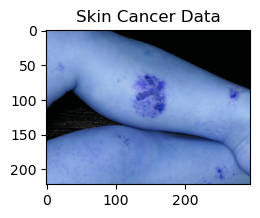

In [6]:
imageShow("Skin Cancer Data",inputDataPath)

In [7]:
print("Image Shape: {}".format(inputDataPath.shape))
print("Image Size is : Image Height: {},  Image Width: {} and Image Channle: {} = {}".format(inputDataPath.shape[0], inputDataPath.shape[1], inputDataPath.shape[2], inputDataPath.size))

Image Shape: (222, 294, 3)
Image Size is : Image Height: 222,  Image Width: 294 and Image Channle: 3 = 195804


<a id="5"></a>

In [8]:
def conv(image, kernel):
    imageH, imageW = image.shape[:2]
    kernelH, kernelW = kernel.shape[:2]
    
    padding = (kernelW-1) // 2
    
    image = cv2.copyMakeBorder(image, 
                              padding, padding,
                              padding, padding, 
                              cv2.BORDER_REFLECT)
    
    
    outputmask = np.zeros((imageH, imageW), dtype= "float32")
    
    
    for y in np.arange(padding, imageH+padding):
        for x in np.arange(padding, imageW+padding):
            # ROI --> Region if Interest
            roi = image[y - padding:y+padding+1, 
                       x - padding: x+padding+1]
            k = (roi*kernel).sum()
            outputmask[y-padding, x-padding] = k
            
            
    outputmask = rescale_intensity(outputmask, in_range = (0, 255))
    outputmask = (outputmask*255).astype("uint8")
    
    return outputmask

In [9]:
imageArgs = {"image":"../input/skindataset/skincancer.jpg"}

In [10]:
imageSamllBlur = np.ones((7, 7), dtype ="float")*(1.0/(7*7))
imageLargeBlur = np.ones((21, 21), dtype ="float")*(1.0/(21*21))

<a id="6"></a>

In [11]:
sharpen = np.array([[0, -1, 0], 
          [-1, 5, -1], 
          [0, -1, 0]], dtype = "int")

In [12]:
image  = cv2.imread(imageArgs["image"])
grayimage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [13]:
print("Image information {}".format(image.shape))
print("\nImage information {}".format(grayimage.shape))

Image information (222, 294, 3)

Image information (222, 294)


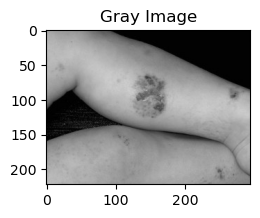

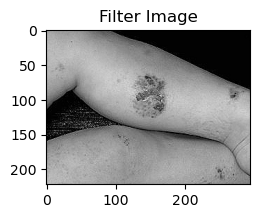

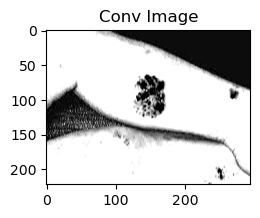

In [14]:
convImage = conv(image, sharpen)
filtersOnImage = cv2.filter2D(grayimage, -1, sharpen)
imageShow("Gray Image", grayimage)
imageShow("Filter Image", filtersOnImage)
imageShow("Conv Image", convImage)

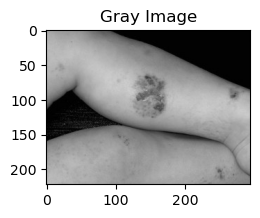

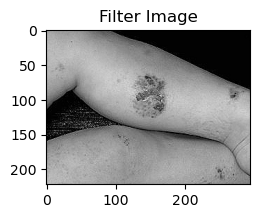

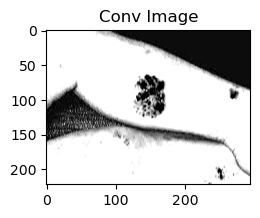

In [15]:
imageShow("Gray Image", grayimage)
imageShow("Filter Image", filtersOnImage)
imageShow("Conv Image", convImage)

In [16]:
emboss = np.array([[-2, 1, 0], 
          [-1, 1, 1], 
          [0, 1, 2]], dtype = "int")

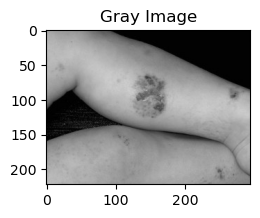

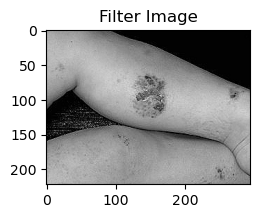

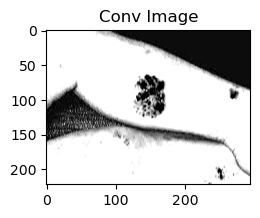

In [17]:
convImage = conv(image, sharpen)
filtersOnImage = cv2.filter2D(grayimage, -1, sharpen)
imageShow("Gray Image", grayimage)
imageShow("Filter Image", filtersOnImage)
imageShow("Conv Image", convImage)

<a id="7"></a>

<a id="8"></a>

In [18]:
RightSobel = np.array([[-1, 0, 1], 
          [-2, 0, 2], 
          [-1, 0, 1]], dtype = "int")

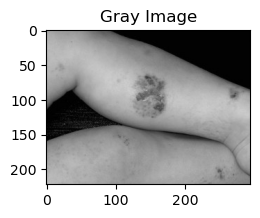

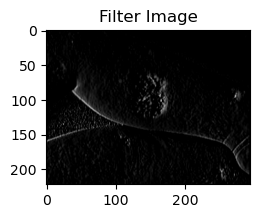

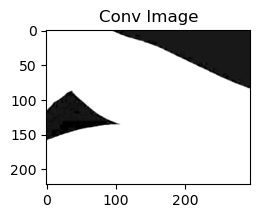

In [19]:
convImage = conv(image, RightSobel)
filtersOnImage = cv2.filter2D(grayimage, -1, RightSobel)
imageShow("Gray Image", grayimage)
imageShow("Filter Image", filtersOnImage)
imageShow("Conv Image", convImage)

<a id="9"></a>

In [20]:
LeftSobel = np.array([[1, 0, -1], 
          [2, 0, -2], 
          [1, 0, -1]], dtype = "int")

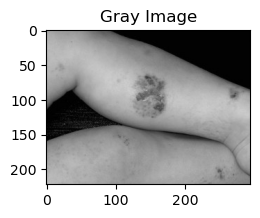

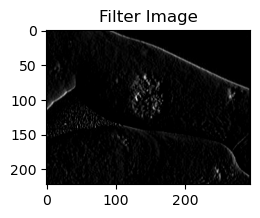

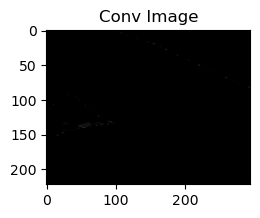

In [21]:
convImage = conv(image, LeftSobel)
filtersOnImage = cv2.filter2D(grayimage, -1, LeftSobel)
imageShow("Gray Image", grayimage)
imageShow("Filter Image", filtersOnImage)
imageShow("Conv Image", convImage)

<a id="10"></a>
<div style=" color:#721C24; padding:10x; border-radius:10px; text-align:center;">
    <p style=" margin-top:0; font: 30px Arial;">The emboss kernel gives the illusion of depth by emphasizing the differences of pixels in a given direction
</p></div>

In [1]:
BottomSobel = np.array([[-1, -2, -1], 
          [0, 0, 0], 
          [1, 2, 1]], dtype = "int")

NameError: name 'np' is not defined

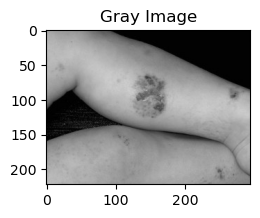

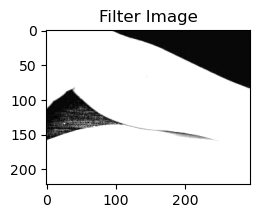

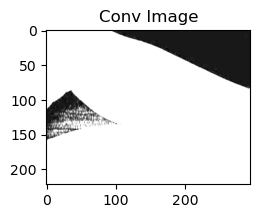

In [23]:
convImage = conv(image, BottomSobel)
filtersOnImage = cv2.filter2D(grayimage, -1, BottomSobel)
imageShow("Gray Image", grayimage)
imageShow("Filter Image", filtersOnImage)
imageShow("Conv Image", convImage)

<a id="11"></a>

In [24]:
TopSobel = np.array([[1, 2, 1], 
          [0, 0, 0], 
          [--1, 2, -1]], dtype = "int")

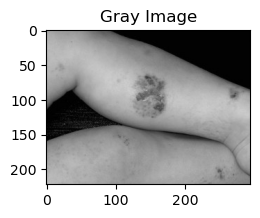

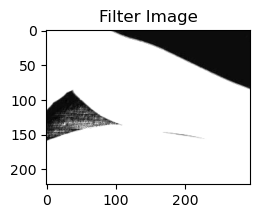

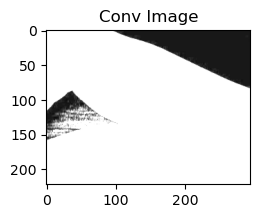

In [25]:
convImage = conv(image, TopSobel)
filtersOnImage = cv2.filter2D(grayimage, -1, TopSobel)
imageShow("Gray Image", grayimage)
imageShow("Filter Image", filtersOnImage)
imageShow("Conv Image", convImage)

<a id="12"></a>

In [26]:
Identity = np.array([[0, 0, 0], 
          [0, 1, 0], 
          [0, 0, 0]], dtype = "int")

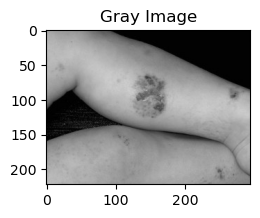

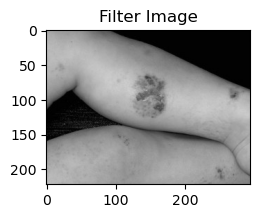

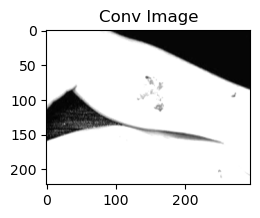

In [27]:
convImage = conv(image, Identity)
filtersOnImage = cv2.filter2D(grayimage, -1, Identity)
imageShow("Gray Image", grayimage)
imageShow("Filter Image", filtersOnImage)
imageShow("Conv Image", convImage)

<a id="13"></a>

In [28]:
Outline = np.array([[-1, -1, -1], 
          [-1, 5, -1], 
          [-1, -1, 1]], dtype = "int")

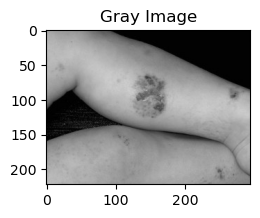

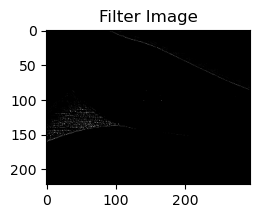

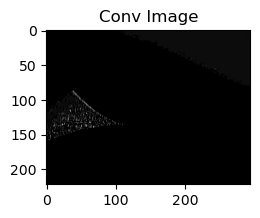

In [29]:
convImage = conv(image, Outline)
filtersOnImage = cv2.filter2D(grayimage, -1, Outline)
imageShow("Gray Image", grayimage)
imageShow("Filter Image", filtersOnImage)
imageShow("Conv Image", convImage)

<a id="14"></a>

In [30]:
Custom = np.array([[-0.1, 0, 0], 
          [0, 1, 0], 
          [0, 0, 0]], dtype = "int")

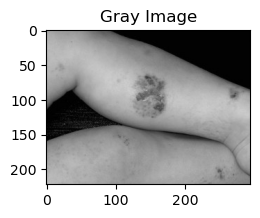

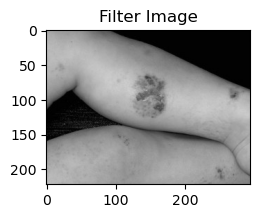

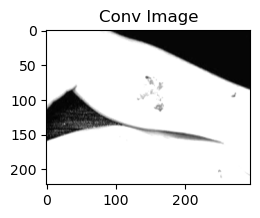

In [31]:
convImage = conv(image, Custom)
filtersOnImage = cv2.filter2D(grayimage, -1, Custom)
imageShow("Gray Image", grayimage)
imageShow("Filter Image", filtersOnImage)
imageShow("Conv Image", convImage)